In [1]:
import pandas as pd
import numpy as np
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import imageio

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


# Setting directory 

In [2]:
import os
os.chdir("F:\\pythan\\newprojet\\DevanagariHandwrittenCharacterDataset")

In [3]:
a=os.listdir("./train") #getting the list of files in the directory

In [4]:
a=list(a)
a

['character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_1_ka',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_2_kha',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'character_3_ga',
 'character_4_gha',
 'character_5_kna',
 'character_6_cha',
 'character_7_chha',
 'character_8_ja',
 'character_9_jha',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [5]:
pwd

'F:\\pythan\\newprojet\\DevanagariHandwrittenCharacterDataset'

# Data preprocessing for train

In [6]:
# getting the images from the files and giving labels to them 
y=[]
x=[]
z=[]
for i in a:
    y.append(i.split('_')[-1])
    for k in os.listdir('./train/'+i):
        x.append(imageio.imread('./train/'+i+'/'+k))
        z.append(i.split('_')[-1])
        


daa


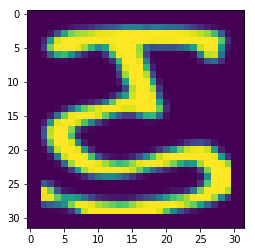

In [7]:
plt.imshow(x[5234])
print(z[5234])

In [8]:
j=sorted(list(set(y)))
z1=[]
for k in z:
    z1.append(j.index(k))


y_train=to_categorical(z1)

In [9]:
# onehotencoding
j=sorted(list(set(y)))
zmr=np.zeros([len(x),len(y)])
for i,k in enumerate(z):
    zmr[i,j.index(k)]=1

In [10]:
print(zmr.shape)  # using onehotencoding 
print(y_train.shape)   # using to_categorical in keras.utils


(78200, 46)
(78200, 46)


In [11]:
x_train=np.asarray(x)
x_train.shape

(78200, 32, 32)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
daa


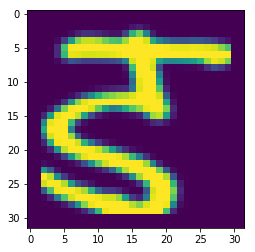

In [12]:
print(y_train[5263])
print(z[5263])
plt.imshow(x_train[5263])

# Data preprocessing for test


In [13]:
y=[]
x=[]
z_=[]
for i in a:
    y.append(i.split('_')[-1])
    for k in os.listdir('./test/'+i):
        x.append(imageio.imread('./test/'+i+'/'+k))
        z_.append(i.split('_')[-1])

In [14]:
j=sorted(list(set(y)))
z1=[]
for k in z_:
    z1.append(j.index(k))


y_test=to_categorical(z1)
y_test.shape

(13800, 46)

In [15]:
x_test=np.asarray(x)
x_test.shape

(13800, 32, 32)

In [16]:
x_test1=x_test.reshape(13800,32,32,1)
x_train1=x_train.reshape(78200,32,32,1)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
yaw


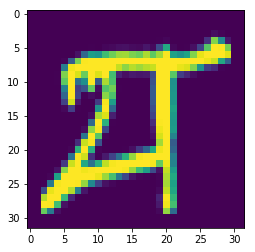

In [17]:
print(y_test[5263])
print(z_[5263])
plt.imshow(x_test[5263])

# CNN Architecture

In [18]:
from keras.models import Sequential
from keras.layers import Convolution2D,Flatten,Dense,MaxPool2D,Dropout

In [20]:
from keras import optimizers 
SGD = optimizers.SGD(lr=0.001, decay=1e-6, momentum=0.9, nesterov=True)

In [21]:
epoch=5
batchs=32

cnn=Sequential()
cnn.add(Convolution2D(filters=32, kernel_size=(2,2),padding='same', input_shape=(32,32,1),activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Convolution2D(filters=64, kernel_size=(2, 2), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Convolution2D(filters=128, kernel_size=(2, 2), activation='relu'))
#cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Convolution2D(filters=64, kernel_size=(2, 2), activation='relu'))
#cnn.add(MaxPool2D(pool_size=(2,2)))

cnn.add(Convolution2D(filters=128, kernel_size=(2, 2), activation='relu'))

cnn.add(Convolution2D(filters=128, kernel_size=(3, 3), activation='relu'))
cnn.add(MaxPool2D(pool_size=(2, 2)))

cnn.add(Flatten())
cnn.add(Dense(512, activation='relu'))

cnn.add(Dense(46, activation='softmax'))

In [22]:
cnn.compile(optimizer=SGD, loss='categorical_crossentropy', metrics=['accuracy'])

In [23]:
cnn.fit(x_train1,y_train,batch_size=batchs,epochs=5,validation_data=(x_test1,y_test),shuffle=True,verbose=1)

Train on 78200 samples, validate on 13800 samples
Epoch 1/5
78200/78200 [==============================] - 108s 1ms/step - loss: 0.6945 - acc: 0.8010 - val_loss: 0.2431 - val_acc: 0.9259
Epoch 2/5
78200/78200 [==============================] - 159s 2ms/step - loss: 0.1641 - acc: 0.9482 - val_loss: 0.1279 - val_acc: 0.9595
Epoch 3/5
78200/78200 [==============================] - 155s 2ms/step - loss: 0.1020 - acc: 0.9680 - val_loss: 0.1316 - val_acc: 0.9610
Epoch 4/5
78200/78200 [==============================] - 142s 2ms/step - loss: 0.0708 - acc: 0.9772 - val_loss: 0.1011 - val_acc: 0.9704
Epoch 5/5
78200/78200 [==============================] - 147s 2ms/step - loss: 0.0517 - acc: 0.9835 - val_loss: 0.0892 - val_acc: 0.9739
